In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [29]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [30]:
res = sm.OLS(y, X).fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     225.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.72e-27
Time:                        09:23:19   Log-Likelihood:                -30.975
No. Observations:                  50   AIC:                             69.95
Df Residuals:                      46   BIC:                             77.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4789      0.025     19.435      0.000       0.429       0.528
x

In [31]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.47885531  0.52963462 -0.02014625  5.09561239]
Standard errors:  [0.02463904 0.09685896 0.00216333 0.15976047]
Predicted values:  [ 4.59195621  5.0765054   5.51980263  5.89298329  6.17759985  6.36865274
  6.47541179  6.51989318  6.5332423   6.55061659  6.60540932  6.72376314
  6.92027495  7.19559762  7.53633277  7.91723208  8.30534548  8.66543481
  8.96576331  9.18330988  9.30755141  9.34219167  9.30455281  9.22272935
  9.13097238  9.06406214  9.05159379  9.11311496  9.25491414  9.46898753
  9.734354   10.02050224 10.29240372 10.51626771 10.66509307 10.72310441
 10.68834398 10.5729933  10.40137175 10.20594103 10.02197174  9.88174851
  9.8092658   9.81628559  9.90040497 10.04545094 10.22413754 10.40254891
 10.54571153 10.62334029]


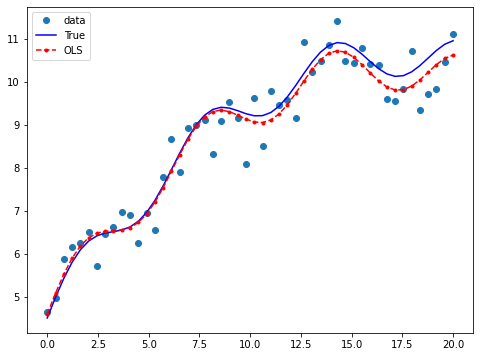

In [33]:
# prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
# ax.plot(x, iv_u, 'r--')
# ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');